**1.1 Data Preprocessing and cleaning**

In [1]:
# Import all the libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


**1.2 Importing the dataset**

In [2]:
GHG_emissions = pd.read_excel('Ammended GHG 2102.xlsx')

In [3]:
GHG_emissions.shape

(15301, 6)

In [4]:
GHG_emissions.head(10)

Year Province Greenhouse Gas Categories                         Sector  \
0  1990  Alberta                    ENERGY  Stationary Combustion Sources   
1  1990  Alberta                    ENERGY  Stationary Combustion Sources   
2  1990  Alberta                    ENERGY  Stationary Combustion Sources   
3  1990  Alberta                    ENERGY  Stationary Combustion Sources   
4  1990  Alberta                    ENERGY  Stationary Combustion Sources   
5  1990  Alberta                    ENERGY  Stationary Combustion Sources   
6  1990  Alberta                    ENERGY  Stationary Combustion Sources   
7  1990  Alberta                    ENERGY  Stationary Combustion Sources   
8  1990  Alberta                    ENERGY  Stationary Combustion Sources   
9  1990  Alberta                    ENERGY                      Transport   

                                Sub-sector         CO2eq  
0  Public Electricity and Heat Production   39757.520636  
1            Petroleum Refining Industries   2992.236166  
2                   Oil and Gas Extraction  26792.197773  
3                                   Mining    297.728045  
4                 Manufacturing Industries  10454.900526  
5                             Construction    238.418694  
6             Commercial and Institutional   5044.153401  
7                              Residential   6741.048314  
8                 Agriculture and Forestry     477.02278  
9                                 Aviation   1136.452093

**1.3 Checking for missing values**

In [5]:
GHG_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15301 entries, 0 to 15300
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       15301 non-null  int64 
 1   Province                   15301 non-null  object
 2   Greenhouse Gas Categories  15301 non-null  object
 3   Sector                     15301 non-null  object
 4   Sub-sector                 15301 non-null  object
 5   CO2eq                      15301 non-null  object
dtypes: int64(1), object(5)
memory usage: 717.4+ KB


In [6]:
GHG_emissions.isnull().sum()

Year                         0
Province                     0
Greenhouse Gas Categories    0
Sector                       0
Sub-sector                   0
CO2eq                        0
dtype: int64

**An indepth look at the dataset reveals that the missing values are the various subsectors with no GHG emissions.**

**1.4 Filling up the missing values with 0**

In [7]:
GHG_emissions.fillna(0, inplace=True)

In [8]:
GHG_emissions.isnull().sum()

Year                         0
Province                     0
Greenhouse Gas Categories    0
Sector                       0
Sub-sector                   0
CO2eq                        0
dtype: int64

** Replacing the non numeric values in the CO2eq column with zero**

In [9]:
# Step 1: Replace non-numeric values with NaN
GHG_emissions['CO2eq'] = pd.to_numeric(GHG_emissions['CO2eq'], errors='coerce')

# Step 2: Fill NaN values with 0
GHG_emissions['CO2eq'].fillna(0, inplace=True)

In [10]:
GHG_emissions['CO2eq'].isnull().sum()

0

**There are now no missing values in the dataset**

**1.5 Convert wrongly classified categorical variables to numeric**

In [11]:
year_columns = GHG_emissions.columns[5:]

GHG_emissions[year_columns] = GHG_emissions[year_columns].apply(pd.to_numeric, errors='coerce')

print(GHG_emissions.dtypes)

Year                           int64
Province                      object
Greenhouse Gas Categories     object
Sector                        object
Sub-sector                    object
CO2eq                        float64
dtype: object


** 1.6 Checking for duplicates**

In [12]:
duplicates = GHG_emissions[GHG_emissions.duplicated()]
duplicates

Empty DataFrame
Columns: [Year, Province, Greenhouse Gas Categories, Sector, Sub-sector, CO2eq]
Index: []

**There are no duplicates.**

# **Exploratory Data Analysis**

**2.1 Display the unique variables in the Province column**

In [13]:
list(GHG_emissions['Province'].unique())

['Alberta',
 'British Columbia',
 'Manitoba',
 'NewBrunswick',
 'NewFoundland',
 'NovaScotia',
 'NorthWest Territories & Nanunut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Yukon',
 'Nunanut',
 'Northwest Territories']

**2.2 What are the unique Greenhouse emissions sources in the dataset**

In [14]:
list(GHG_emissions['Greenhouse Gas Categories'].unique())

['ENERGY', 'INDUSTRIAL PROCESSES AND PRODUCT USE', 'AGRICULTURE', 'WASTE']

**2.3 What are the unique sectors for each Greenhouse gas emissions source in the data**


In [15]:
unique_subsectors = GHG_emissions.groupby('Greenhouse Gas Categories')['Sector'].unique().reset_index()
unique_subsectors

Greenhouse Gas Categories  \
0                           AGRICULTURE   
1                                ENERGY   
2  INDUSTRIAL PROCESSES AND PRODUCT USE   
3                                 WASTE   

                                              Sector  
0  [Enteric Fermentation, Manure Management, Agri...  
1  [Stationary Combustion Sources, Transport, Fug...  
2  [Mineral Products, Chemical Industry, Metal Pr...  
3  [Solid Waste Disposal (Landfills)  , Biologica...

**2.4 Checking the count of unique Greenhouse gas emissons Sector**

In [16]:
len(GHG_emissions["Sector"].unique())

23

**There are 22 Greenhouse gas emissions sectors**

**2.5 Checking the count of unique Greenhouse gas emissons Sub-sector**

In [17]:
len(GHG_emissions["Sub-sector"].unique())

43

**2.4 Identifying the total greenhouse gas emissions for each Province**

In [18]:
sum_co2eq_by_province = GHG_emissions.groupby('Province')['CO2eq'].sum().reset_index()
sorted_co2eq_by_province = sum_co2eq_by_province.sort_values(by='CO2eq', ascending=False)
sorted_co2eq_by_province['CO2eq'] = sorted_co2eq_by_province['CO2eq'].round(2)

# Displaying 'Province' and 'CO2eq' columns
print(sorted_co2eq_by_province[['Province', 'CO2eq']])

                           Province       CO2eq
0                           Alberta  7465475.48
9                           Ontario  5752993.82
11                           Quebec  2857603.08
12                     Saskatchewan  2093004.71
1                  British Columbia  1875698.25
2                          Manitoba   642994.60
7                        NovaScotia   612635.31
3                      NewBrunswick   523739.23
4                      NewFoundland   312993.17
10             Prince Edward Island    56445.78
6             Northwest Territories    33418.33
13                            Yukon    18173.08
5   NorthWest Territories & Nanunut    16917.47
8                           Nunanut    12854.78


**2.5 Identifying the total greenhouse gas emissions for each Category**

In [19]:
sum_co2eq_by_category = GHG_emissions.groupby('Greenhouse Gas Categories')['CO2eq'].sum().reset_index()
sum_co2eq_by_category['CO2eq'] = sum_co2eq_by_category['CO2eq'].round(2)
sorted_co2eq_by_category = sum_co2eq_by_category.sort_values(by='CO2eq', ascending=False)
sorted_co2eq_by_category

Greenhouse Gas Categories        CO2eq
1                                ENERGY  18015036.97
2  INDUSTRIAL PROCESSES AND PRODUCT USE   1984840.06
0                           AGRICULTURE   1613912.24
3                                 WASTE    661157.82

**2.6 Identifying the total greenhouse gas emissions for each Sector**

In [20]:
sum_co2eq_by_sector = GHG_emissions.groupby('Sector')['CO2eq'].sum().reset_index()
sum_co2eq_by_sector['CO2eq'] = sum_co2eq_by_sector['CO2eq'].round(2)
sorted_co2eq_by_sector = sum_co2eq_by_sector.sort_values(by='CO2eq', ascending=False)
sorted_co2eq_by_sector

Sector        CO2eq
20                      Stationary Combustion Sources  10117740.12
21                                          Transport   5783849.81
7                                    Fugitive Sources   2113443.29
13                                   Metal Production    862404.42
5                                Enteric Fermentation    836561.60
15    Non-Energy Products from Fuels and Solvent Useb    556466.64
19                 Solid Waste Disposal (Landfills)      547554.19
0                                  Agricultural Soils    469312.63
14                                   Mineral Products    263293.07
12                                  Manure Management    244931.36
17  Production and Consumption of Halocarbons, SF6...    185020.16
4                                  Chemical Industryb    101097.77
22               Wastewater Treatment and Discharge       66814.70
11  Liming, Urea Application and Other Carbon-Cont...     59970.47
10                    Industrial Wood Waste Landfills     28722.10
16                  Other Product Manufacture and Use     16558.00
9            Incineration and Open Burning of Waste        8884.59
1                 Biological Treatment of Solid Waste      7795.59
6              Field Burning of Agricultural Residues      3136.18
18                  Solid Waste Disposal (Landfills)       1385.87
2                          CO2 Transport and Storage          3.75
8             Incineration and Open Burning of Waste          0.78
3                                   Chemical Industry         0.00

**2.7 Identifying the total CO2eq for each Greenhouse gas categories, Province by Province**

In [21]:
sum_co2eq_by_category_province = GHG_emissions.groupby(['Province', 'Greenhouse Gas Categories'])['CO2eq'].sum().reset_index()
sum_co2eq_by_category_province['CO2eq'] = sum_co2eq_by_category_province['CO2eq'].round(2)
sorted_co2eq_by_category_province = sum_co2eq_by_category_province.sort_values(by=['Greenhouse Gas Categories', 'CO2eq'], ascending=[True, False])
sorted_co2eq_by_category_province


Province             Greenhouse Gas Categories  \
0                           Alberta                           AGRICULTURE   
48                     Saskatchewan                           AGRICULTURE   
36                          Ontario                           AGRICULTURE   
44                           Quebec                           AGRICULTURE   
8                          Manitoba                           AGRICULTURE   
4                  British Columbia                           AGRICULTURE   
12                     NewBrunswick                           AGRICULTURE   
28                       NovaScotia                           AGRICULTURE   
40             Prince Edward Island                           AGRICULTURE   
16                     NewFoundland                           AGRICULTURE   
20  NorthWest Territories & Nanunut                           AGRICULTURE   
24            Northwest Territories                           AGRICULTURE   
32                          Nunanut                           AGRICULTURE   
52                            Yukon                           AGRICULTURE   
1                           Alberta                                ENERGY   
37                          Ontario                                ENERGY   
45                           Quebec                                ENERGY   
49                     Saskatchewan                                ENERGY   
5                  British Columbia                                ENERGY   
29                       NovaScotia                                ENERGY   
13                     NewBrunswick                                ENERGY   
9                          Manitoba                                ENERGY   
17                     NewFoundland                                ENERGY   
41             Prince Edward Island                                ENERGY   
25            Northwest Territories                                ENERGY   
53                            Yukon                                ENERGY   
21  NorthWest Territories & Nanunut                                ENERGY   
33                          Nunanut                                ENERGY   
38                          Ontario  INDUSTRIAL PROCESSES AND PRODUCT USE   
46                           Quebec  INDUSTRIAL PROCESSES AND PRODUCT USE   
2                           Alberta  INDUSTRIAL PROCESSES AND PRODUCT USE   
6                  British Columbia  INDUSTRIAL PROCESSES AND PRODUCT USE   
50                     Saskatchewan  INDUSTRIAL PROCESSES AND PRODUCT USE   
10                         Manitoba  INDUSTRIAL PROCESSES AND PRODUCT USE   
14                     NewBrunswick  INDUSTRIAL PROCESSES AND PRODUCT USE   
30                       NovaScotia  INDUSTRIAL PROCESSES AND PRODUCT USE   
18                     NewFoundland  INDUSTRIAL PROCESSES AND PRODUCT USE   
42             Prince Edward Island  INDUSTRIAL PROCESSES AND PRODUCT USE   
26            Northwest Territories  INDUSTRIAL PROCESSES AND PRODUCT USE   
34                          Nunanut  INDUSTRIAL PROCESSES AND PRODUCT USE   
54                            Yukon  INDUSTRIAL PROCESSES AND PRODUCT USE   
22  NorthWest Territories & Nanunut  INDUSTRIAL PROCESSES AND PRODUCT USE   
39                          Ontario                                 WASTE   
47                           Quebec                                 WASTE   
3                           Alberta                                 WASTE   
7                  British Columbia                                 WASTE   
51                     Saskatchewan                                 WASTE   
11                         Manitoba                                 WASTE   
15                     NewBrunswick                                 WASTE   
31                       NovaScotia                                 WASTE   
19                     NewFoundland                                 WASTE   
43             Prince E

**2.8 Identifying the total CO2eq for each year**

In [22]:
sum_co2eq_by_year = GHG_emissions.groupby('Year')['CO2eq'].sum().reset_index()
sum_co2eq_by_year['CO2eq'] = sum_co2eq_by_year['CO2eq'].round(2)
sorted_co2eq_by_year = sum_co2eq_by_year.sort_values(by='CO2eq', ascending=False)

# Displaying 'Year' and 'CO2eq' columns
print(sorted_co2eq_by_year[['Year', 'CO2eq']])

    Year      CO2eq
17  2007  754369.47
14  2004  743938.51
13  2003  742107.61
15  2005  738222.16
18  2008  737150.94
16  2006  732210.76
23  2013  728780.53
10  2000  727555.93
25  2015  725655.97
12  2002  723756.08
28  2018  723090.82
24  2014  722846.83
22  2012  721851.93
29  2019  721842.26
11  2001  718275.49
21  2011  717053.68
27  2017  710855.78
20  2010  707720.85
26  2016  707356.79
9   1999  702643.63
19  2009  695677.52
8   1998  691534.10
7   1997  685484.80
6   1996  670072.59
31  2021  669458.99
30  2020  658125.51
5   1995  648526.76
4   1994  632363.76
3   1993  612820.67
2   1992  609955.38
0   1990  599542.86
1   1991  594098.11


# **Univariate Analysis**

**3.1 Descriptive Statistics**

In [23]:
GHG_emissions.describe()

Year         CO2eq
count  15301.000000  15301.000000
mean    2005.607738   1455.783746
std        9.140128   5254.797747
min     1990.000000      0.000000
25%     1998.000000      0.000000
50%     2006.000000     49.883999
75%     2013.000000    642.604083
max     2021.000000  92441.330686

**3.2 Plotting histogram of Numerical variable, CO2eq**

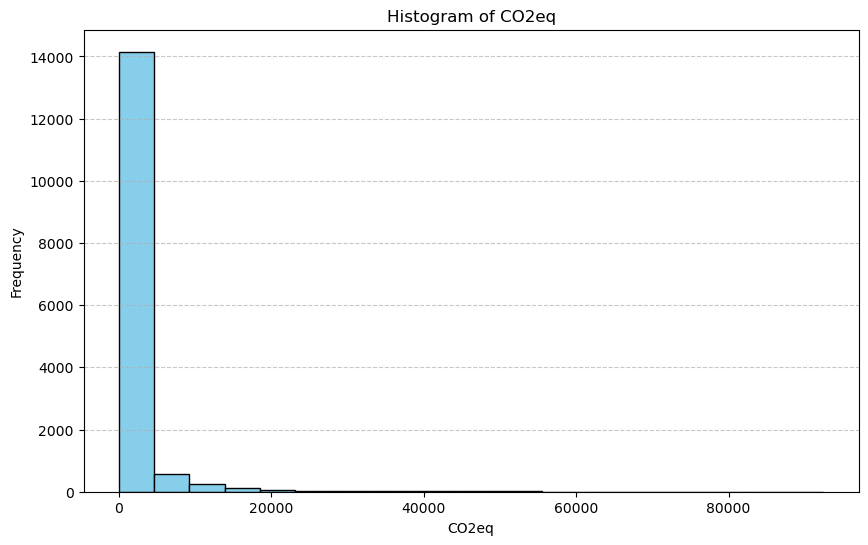

In [24]:
 #Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(GHG_emissions['CO2eq'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CO2eq')
plt.xlabel('CO2eq')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.3 Barchart of Categorical Variables**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ENERGY'),
  Text(1, 0, 'INDUSTRIAL PROCESSES AND PRODUCT USE'),
  Text(2, 0, 'AGRICULTURE'),
  Text(3, 0, 'WASTE')])

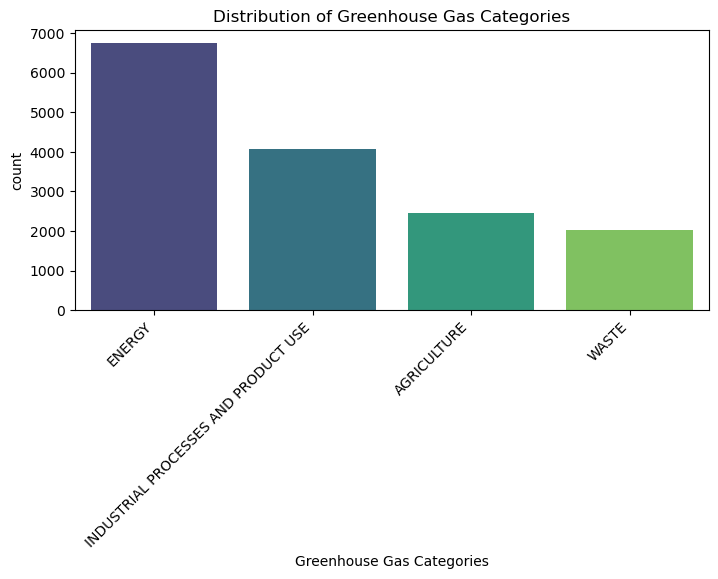

In [25]:
# Assuming 'Greenhouse Gas Categories'
plt.figure(figsize=(18, 8))

# Bar chart for 'Greenhouse Gas Categories'
plt.subplot(2, 2, 1)
sns.countplot(x='Greenhouse Gas Categories', data=GHG_emissions, palette='viridis')
plt.title('Distribution of Greenhouse Gas Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability



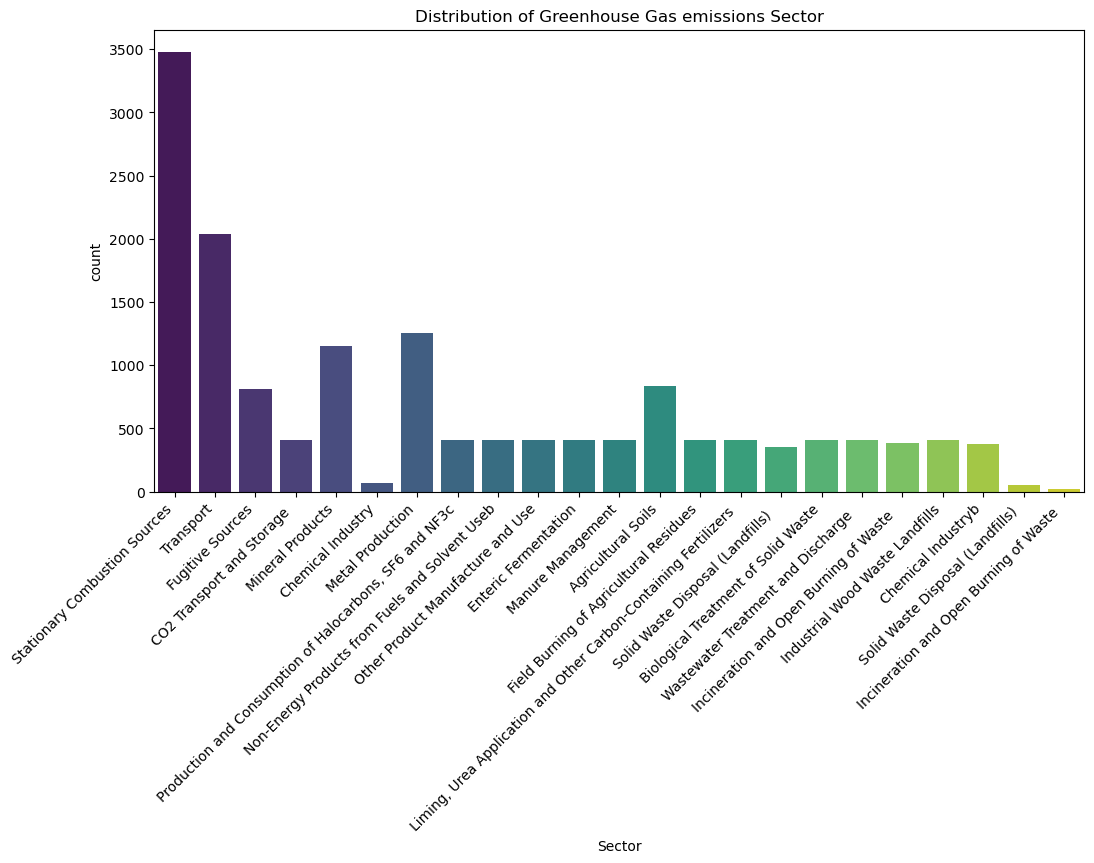

In [26]:
# Assuming 'Sector' is your categorical variable
plt.figure(figsize=(12, 6))

# Bar chart for 'Sector'
sns.countplot(x='Sector', data=GHG_emissions, palette='viridis')
plt.title('Distribution of Greenhouse Gas emissions Sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

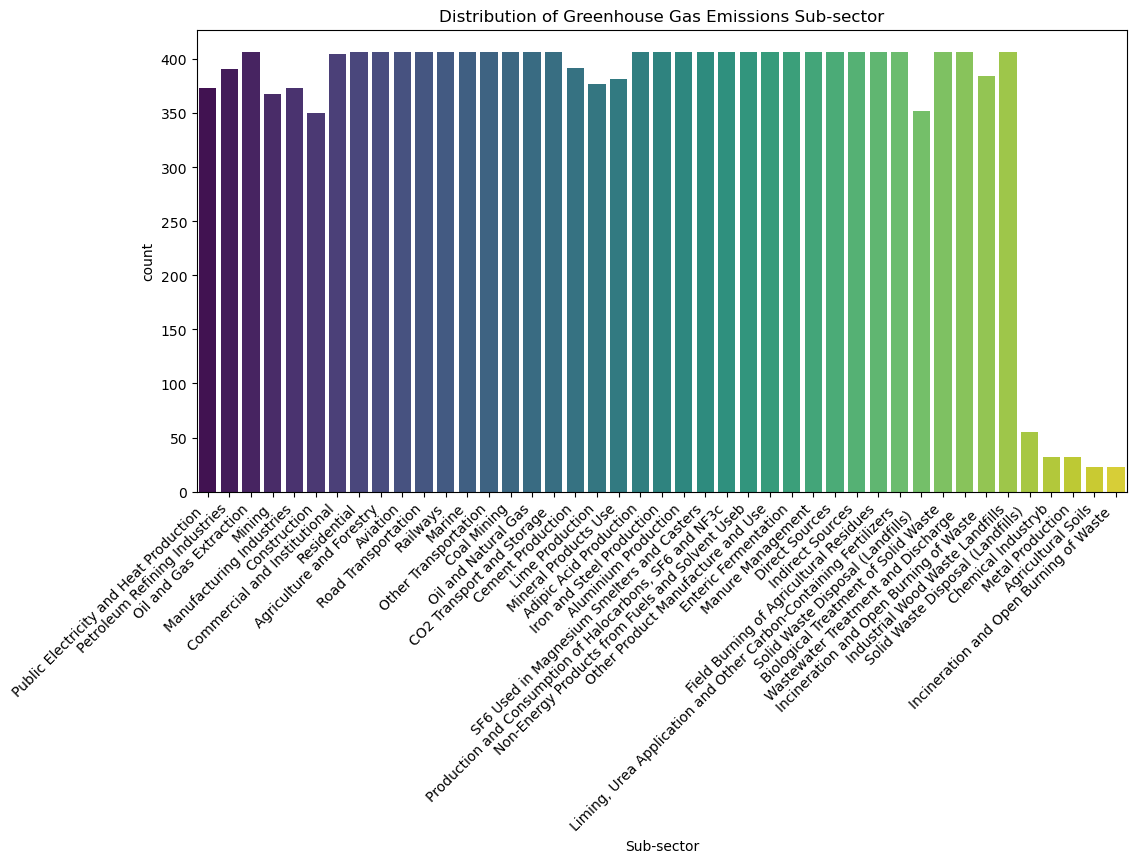

In [27]:
# Assuming 'Sub-sector' is your categorical variable
plt.figure(figsize=(12, 6))

# Filter the DataFrame to exclude rows where 'Sub-sector' is 0 (both as integer and string)
filtered_data = GHG_emissions[~GHG_emissions['Sub-sector'].isin([0, '0'])]

# Bar chart for 'Sub-sector'
sns.countplot(x='Sub-sector', data=filtered_data, palette='viridis')
plt.title('Distribution of Greenhouse Gas Emissions Sub-sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()


**3.3 Visualizing the greenhouse gas emissions by Province**

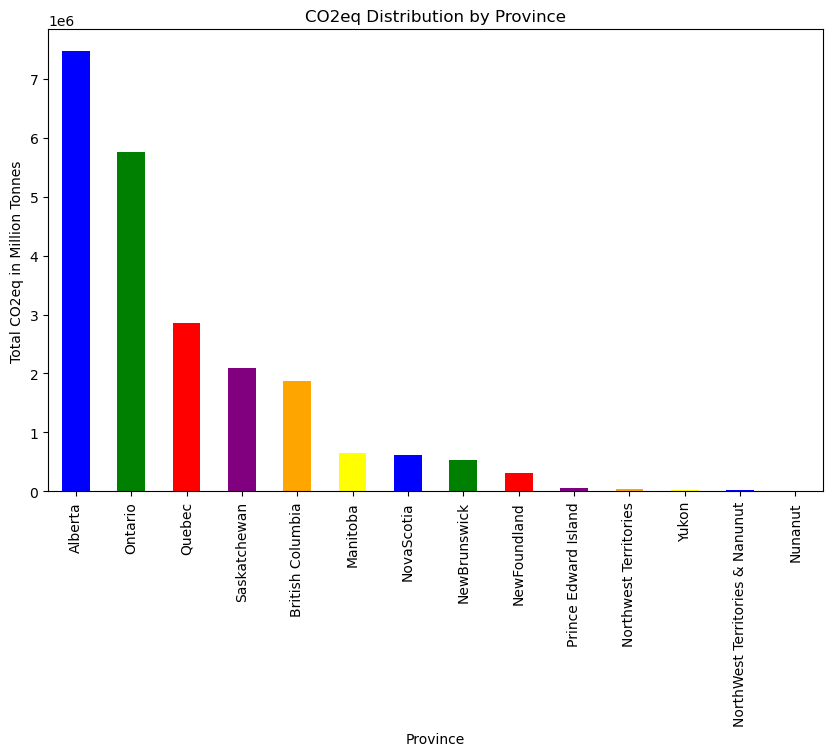

In [28]:
# Group by 'Province' and calculate the sum of 'CO2eq' for each region
sum_by_province = GHG_emissions.groupby('Province')['CO2eq'].sum()

# Sort the regions by CO2eq in descending order
sorted_sum_by_province = sum_by_province.sort_values(ascending=False)

# Define different colors for each region
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']

# Plot the bar chart with different colors
plt.figure(figsize=(10, 6))
sorted_sum_by_province.plot(kind='bar', color=colors)
plt.title('CO2eq Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Total CO2eq in Million Tonnes')
plt.show()

**From the bar chart above Albert,Ontario and Quebec have the highest green house gas emissions**

**3.4 Visualizing Emissions percentage by GHG categories**

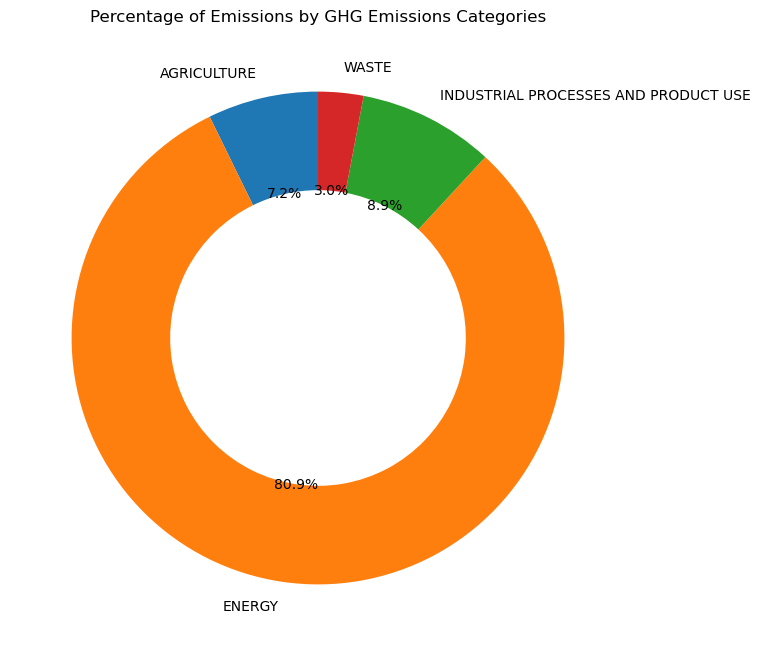

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Group by 'GHG Categries' and calculate the sum for each group for the 'CO2eq' column
sum_by_GHG_categories = GHG_emissions.groupby('Greenhouse Gas Categories')['CO2eq'].sum()

# Plot a pie chart
plt.pie(sum_by_GHG_categories, labels=sum_by_GHG_categories.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Add title
plt.title('Percentage of Emissions by GHG Emissions Categories')

# Show the plot
plt.show()

**The piechart shows that Energy sector contributes 81.7% of the total GHG emissions**

**3.5 Visualizing the percentage of GHG Emissions sources in Energy sector**

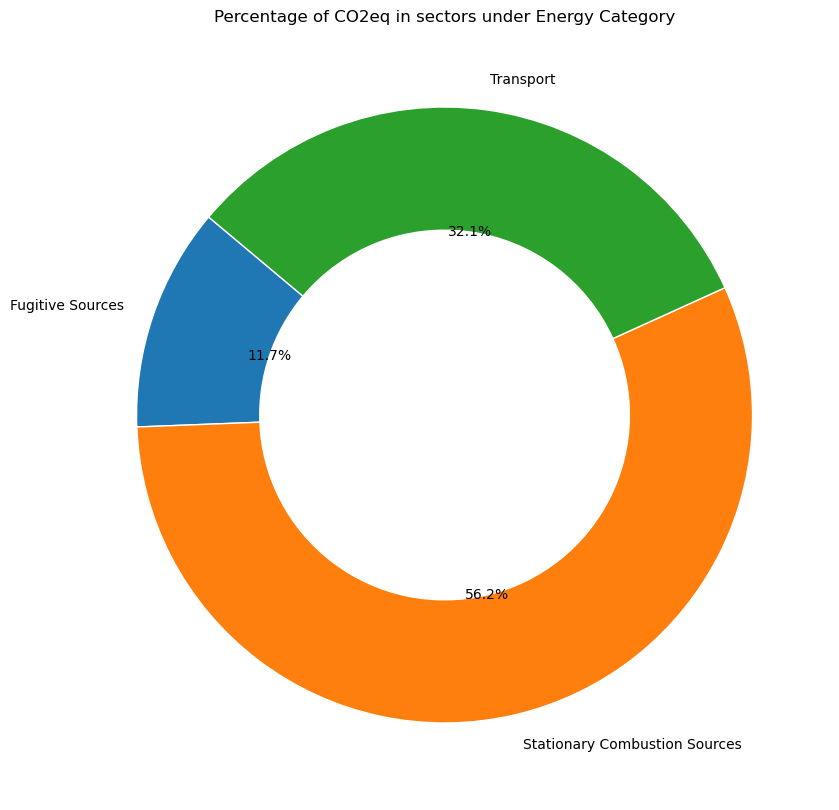

In [30]:
selected_sectors = ['Stationary Combustion Sources', 'Transport', 'Fugitive Sources']

# Filter the DataFrame to include only rows related to the selected sectors
selected_data = GHG_emissions[GHG_emissions['Sector'].isin(selected_sectors)]

# Group by 'Sector' and calculate the sum of 'CO2eq'
sum_co2eq_by_sector = selected_data.groupby('Sector')['CO2eq'].sum()

# Create a doughnut chart with different colors for each portion
plt.figure(figsize=(10, 10))
colors = plt.cm.tab10.colors  # Using tab10 colormap for darker colors

# Create a pie chart with a white circle at the center to create the doughnut effect
plt.pie(sum_co2eq_by_sector, labels=sum_co2eq_by_sector.index, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1), colors=colors)

plt.title('Percentage of CO2eq in sectors under Energy Category')
plt.show()

**Stationary Combustion Sources contributes 56.2% of the CO2eq emissions in the Energy Sector**

**Breakdown of GHG emissions sub-sectors under Stationary Combustion Sources sector**

In [31]:
sum_co2eq_by_subsector = GHG_emissions.groupby('Sub-sector')['CO2eq'].sum().reset_index()
sum_co2eq_by_subsector['CO2eq'] = sum_co2eq_by_subsector['CO2eq'].round(2)
sorted_co2eq_by_subsector = sum_co2eq_by_subsector.sort_values(by='CO2eq', ascending=False)

# Displaying 'Year' and 'CO2eq' columns
print(sorted_co2eq_by_subsector[['Sub-sector', 'CO2eq']])

                                           Sub-sector       CO2eq
38                                Road Transportation  3729698.89
35            Public Electricity and Heat Production   3241374.56
29                             Oil and Gas Extraction  2126230.07
30                                Oil and Natural Gas  2060054.97
22                           Manufacturing Industries  1551186.35
32                               Other Transportation  1493426.25
37                                        Residential  1369451.78
10                       Commercial and Institutional   993162.74
13                               Enteric Fermentation   836561.60
28    Non-Energy Products from Fuels and Solvent Useb   556466.64
41                 Solid Waste Disposal (Landfills)     547554.19
33                      Petroleum Refining Industries   539236.74
12                                     Direct Sources   365681.37
19                          Iron and Steel Production   325037.26
3         

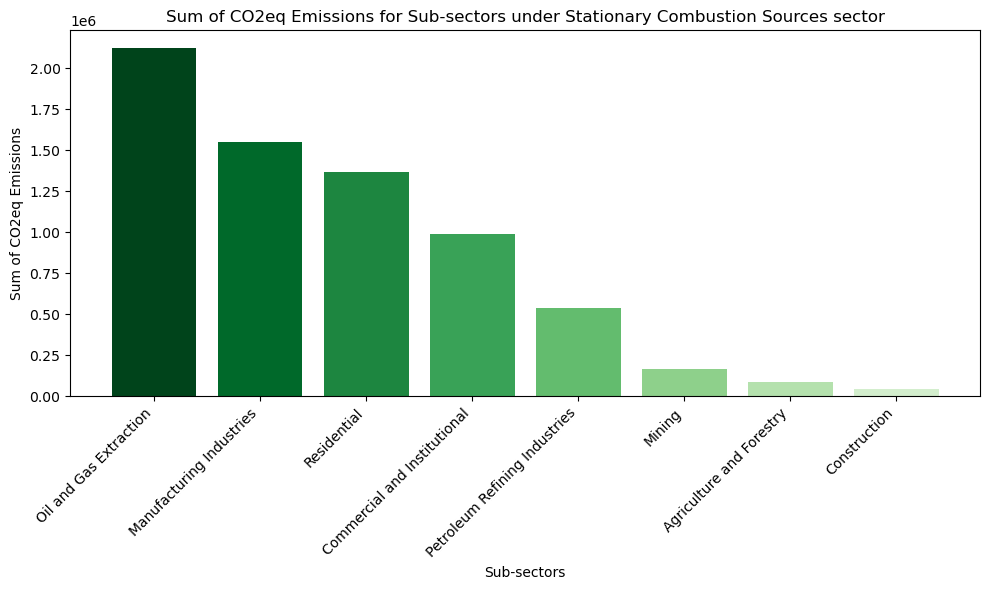

In [32]:
# Filter sub-sectors of interest
subsectors_of_interest = ['Public Electricity and Heat Production', 'Petroleum Refining Industries',
                          'Oil and Gas Extraction', 'Mining', 'Manufacturing Industries',
                          'Construction', 'Commercial and Institutional', 'Residential',
                          'Agriculture and Forestry']
filtered_data = sorted_co2eq_by_subsector[sorted_co2eq_by_subsector['Sub-sector'].isin(subsectors_of_interest)]

# Define color shades
num_subsectors = len(filtered_data)
colors = plt.cm.Greens(np.linspace(0.2, 1, num_subsectors))

# Reverse the order of colors
colors = colors[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Sub-sector'], filtered_data['CO2eq'], color=colors)
plt.xlabel('Sub-sectors')
plt.ylabel('Sum of CO2eq Emissions')
plt.title('Sum of CO2eq Emissions for Sub-sectors under Stationary Combustion Sources sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Breakdown of GHG emissions sub-sectors under Fugitive Sources sector**

In [33]:
sum_co2eq_by_subsector1 = GHG_emissions.groupby('Sub-sector')['CO2eq'].sum().reset_index()
sum_co2eq_by_subsector1['CO2eq'] = sum_co2eq_by_subsector1['CO2eq'].round(2)
sorted_co2eq_by_subsector1 = sum_co2eq_by_subsector1.sort_values(by='CO2eq', ascending=False)

# Displaying 'Year' and 'CO2eq' columns
print(sorted_co2eq_by_subsector1[['Sub-sector', 'CO2eq']])

                                           Sub-sector       CO2eq
38                                Road Transportation  3729698.89
35            Public Electricity and Heat Production   3241374.56
29                             Oil and Gas Extraction  2126230.07
30                                Oil and Natural Gas  2060054.97
22                           Manufacturing Industries  1551186.35
32                               Other Transportation  1493426.25
37                                        Residential  1369451.78
10                       Commercial and Institutional   993162.74
13                               Enteric Fermentation   836561.60
28    Non-Energy Products from Fuels and Solvent Useb   556466.64
41                 Solid Waste Disposal (Landfills)     547554.19
33                      Petroleum Refining Industries   539236.74
12                                     Direct Sources   365681.37
19                          Iron and Steel Production   325037.26
3         

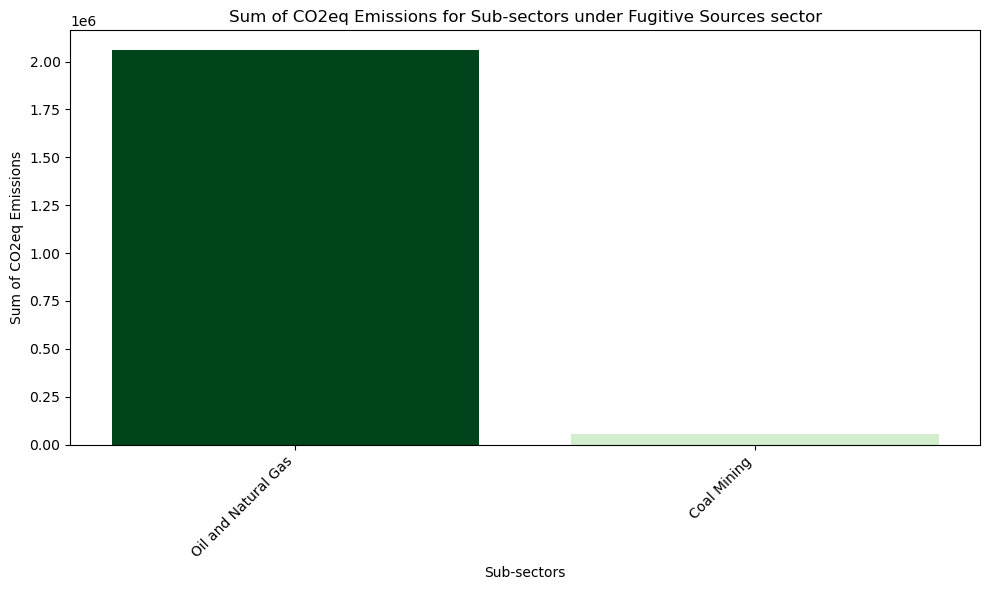

In [34]:
# Filter sub-sectors of interest
subsectors_of_interest1 = ['Coal Mining', 'Oil and Natural Gas']
filtered_data1 = sorted_co2eq_by_subsector1[sorted_co2eq_by_subsector1['Sub-sector'].isin(subsectors_of_interest1)]

# Define color shades
num_subsectors = len(filtered_data1)
colors = plt.cm.Greens(np.linspace(0.2, 1, num_subsectors))

# Reverse the order of colors
colors = colors[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(filtered_data1['Sub-sector'], filtered_data1['CO2eq'], color=colors)
plt.xlabel('Sub-sectors')
plt.ylabel('Sum of CO2eq Emissions')
plt.title('Sum of CO2eq Emissions for Sub-sectors under Fugitive Sources sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Bivariate Analysis**


**4.1 Distribution of CO2eq emissions by Province and Emissions Source**

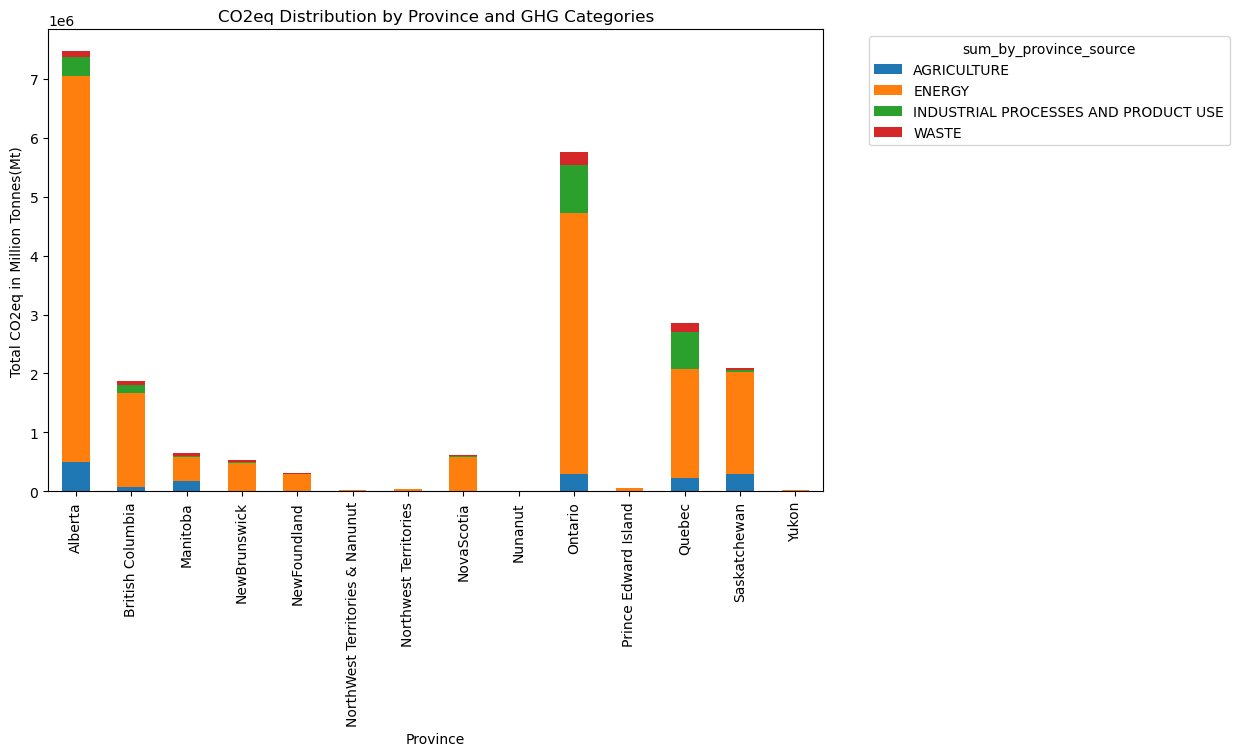

In [35]:
# Group by 'Province' and 'Greenhouse Gas Categories', then calculate the sum of 'CO2eq' for each combination
sum_by_province_source = GHG_emissions.groupby(['Province', 'Greenhouse Gas Categories'])['CO2eq'].sum().unstack()

# Plot the stacked bar chart
sum_by_province_source.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('CO2eq Distribution by Province and GHG Categories')
plt.xlabel('Province')
plt.ylabel('Total CO2eq in Million Tonnes(Mt)')
plt.legend(title='sum_by_province_source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Alberta Province has the highest greenhouse gas emissions in Canada and the Energy sector contributed the most to the GHG emissions in Alberta**

**4.2 Piechart showing percentage of the various Greenhouse Gas emissions sector in each Greenhouse Gas Emissions Category**

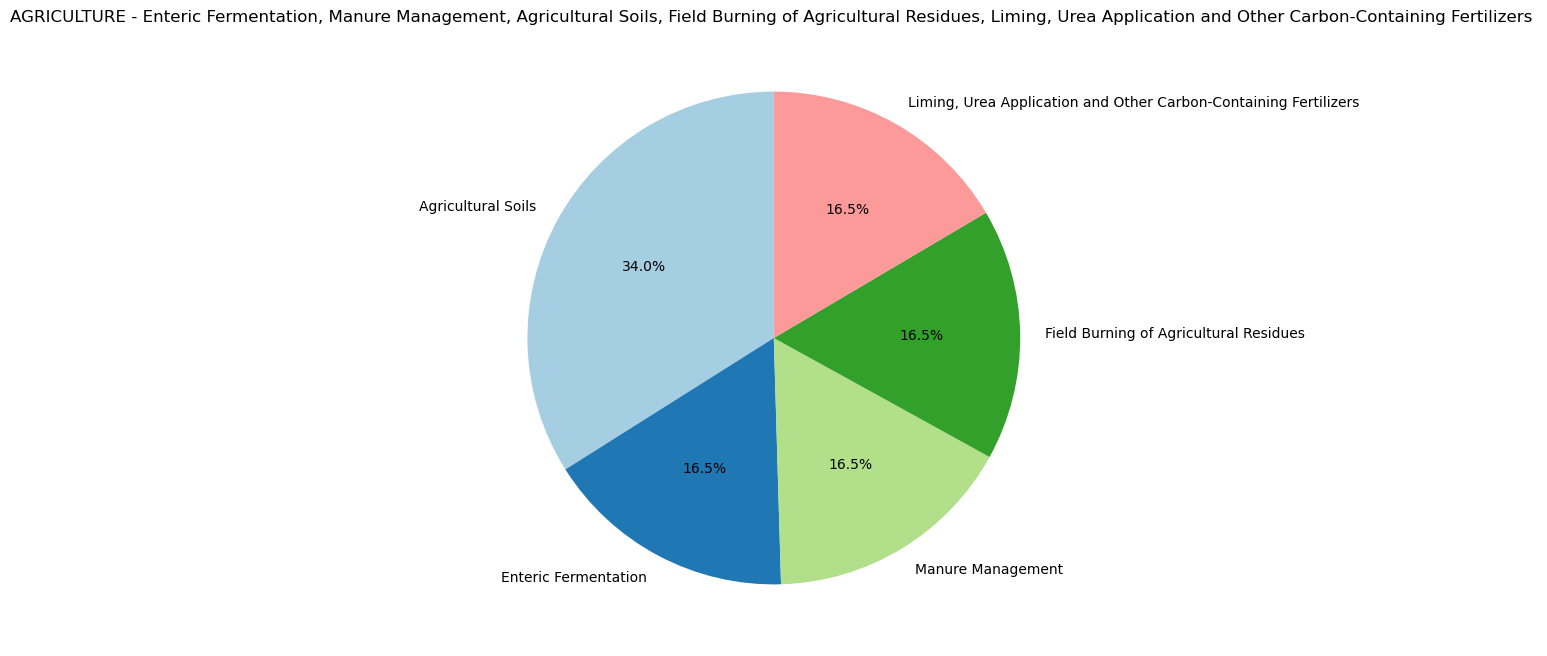

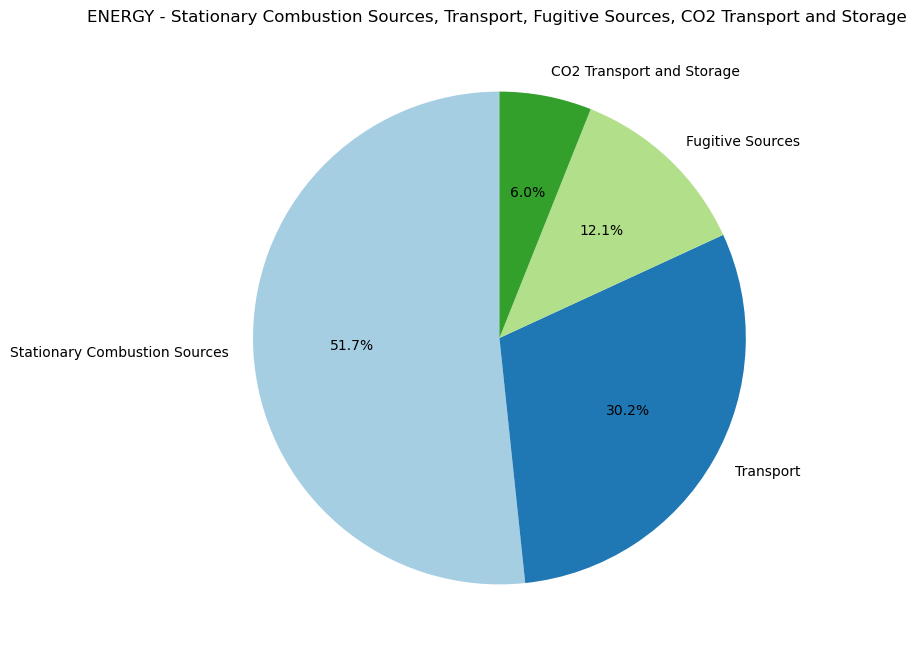

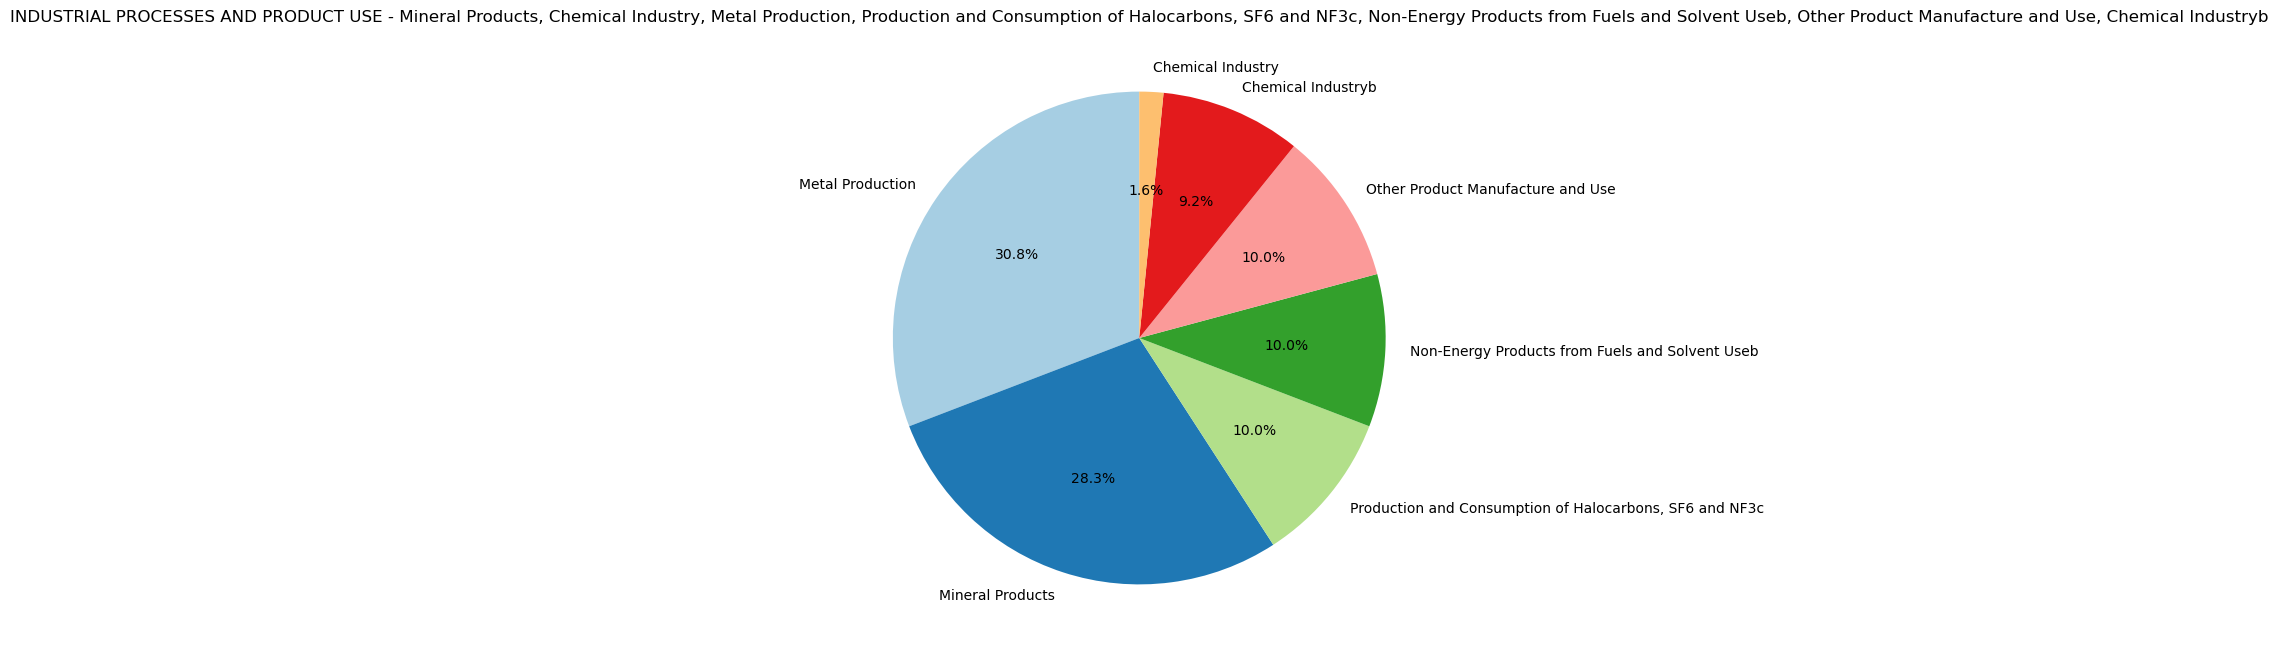

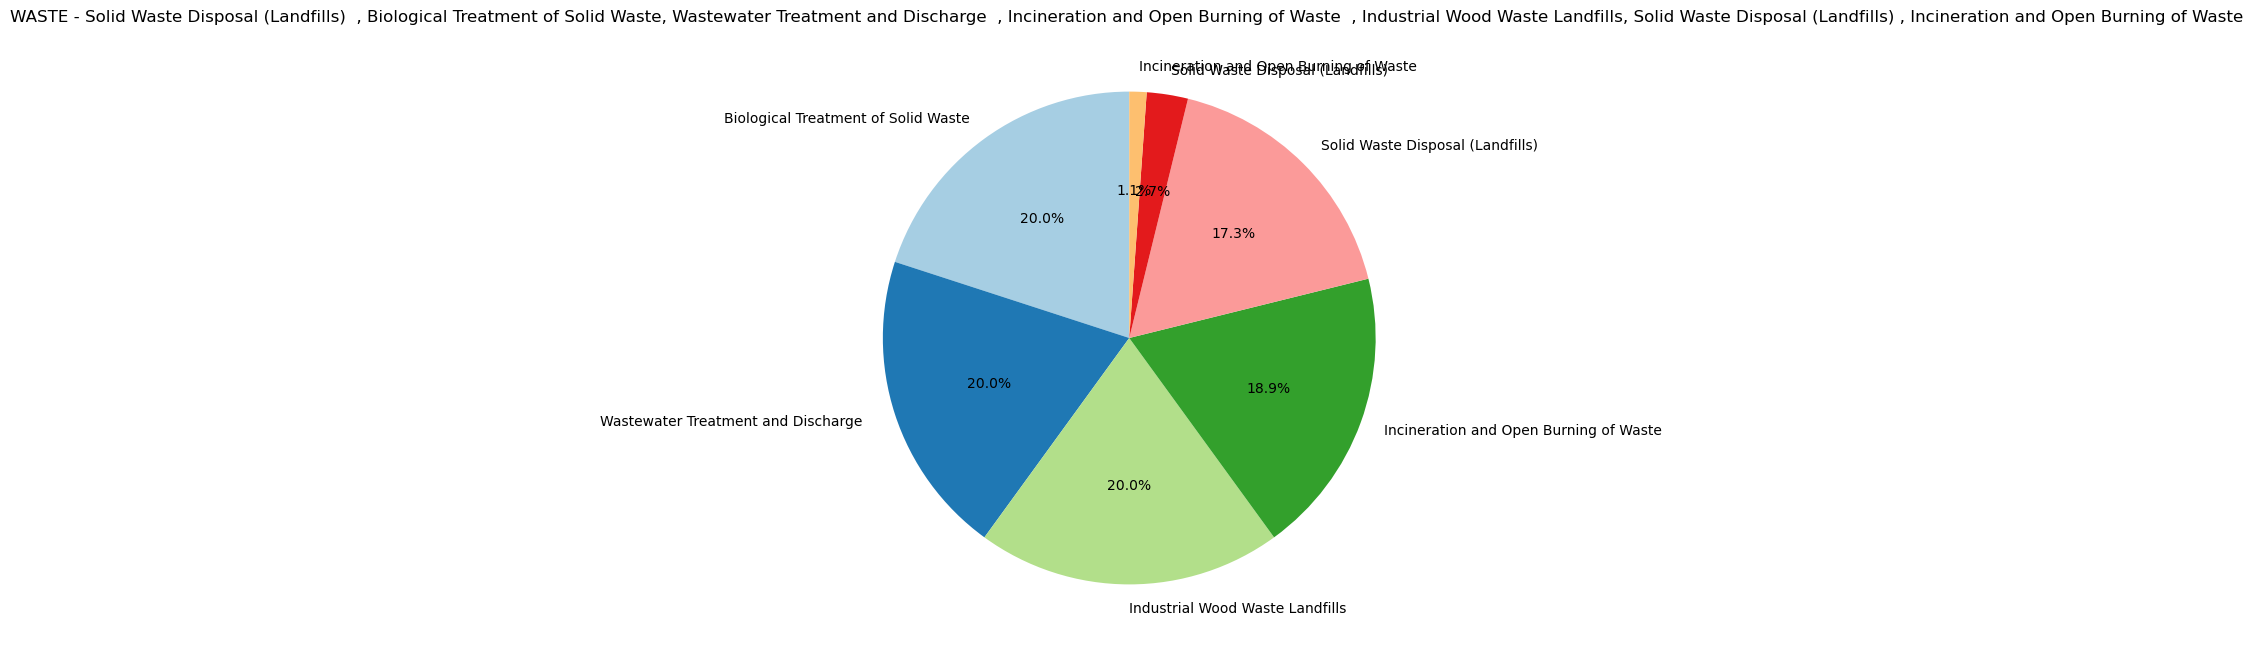

In [36]:
# Group by 'Greenhouse Gas Categories' and get unique subsectors for each category
unique_subsectors = GHG_emissions.groupby('Greenhouse Gas Categories')['Sector'].unique().reset_index()

# Create a separate pie chart for each GHG category
for i, (category, subsectors) in enumerate(zip(unique_subsectors['Greenhouse Gas Categories'], unique_subsectors['Sector'])):
    subset_data = GHG_emissions[GHG_emissions['Greenhouse Gas Categories'] == category]

    # Set up the matplotlib figure for each category
    plt.figure(figsize=(8, 8))

    sizes = subset_data['Sector'].value_counts()

    plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'{category} - {", ".join(subsectors)}')

    # Show the plot for each category
    plt.show()

**4.3 Box plot of CO2eq by Provinces**

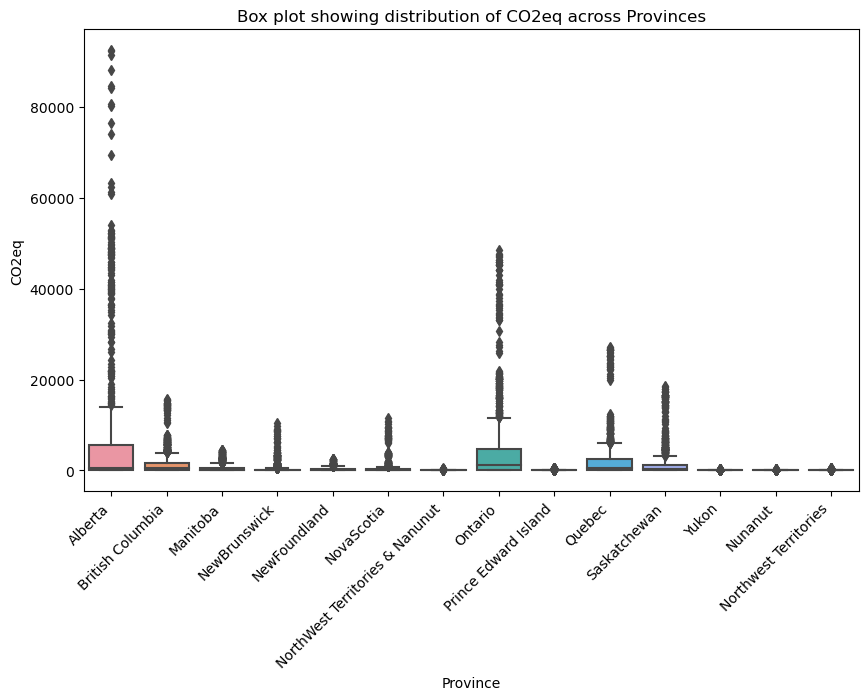

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='CO2eq', data=GHG_emissions)
plt.xlabel('Province')
plt.ylabel('CO2eq')
plt.xticks(rotation=45, ha='right')
plt.title('Box plot showing distribution of CO2eq across Provinces')
plt.show()

**The boxplot shows what appears like outliers in Alberta and Ontario Provinces. However these are not outliers, they are consistent with the Co2eq amount in megatonnes for these Provinces**

**4.4 Box plot of CO2eq by Emissions Source**

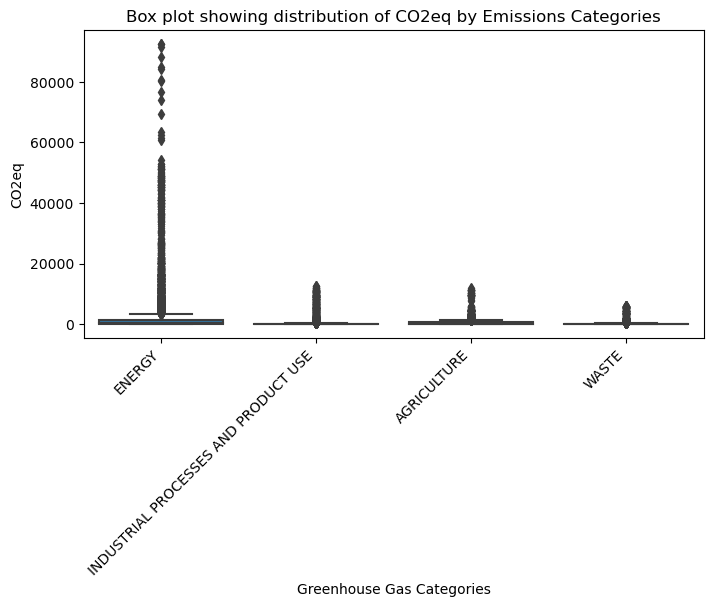

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Greenhouse Gas Categories', y='CO2eq', data=GHG_emissions)
plt.xlabel('Greenhouse Gas Categories')
plt.ylabel('CO2eq')
plt.xticks(rotation=45, ha='right')
plt.title('Box plot showing distribution of CO2eq by Emissions Categories')
plt.show()

**This box plot shows what appears like outliers for Energy sector. These are not outliers.From the analysis done so far, Energy sector is a major contributor to Canada's greenhouse gas emissions**

**4.5 Percentage contribution of each Province to total greenhouse gas emissions**

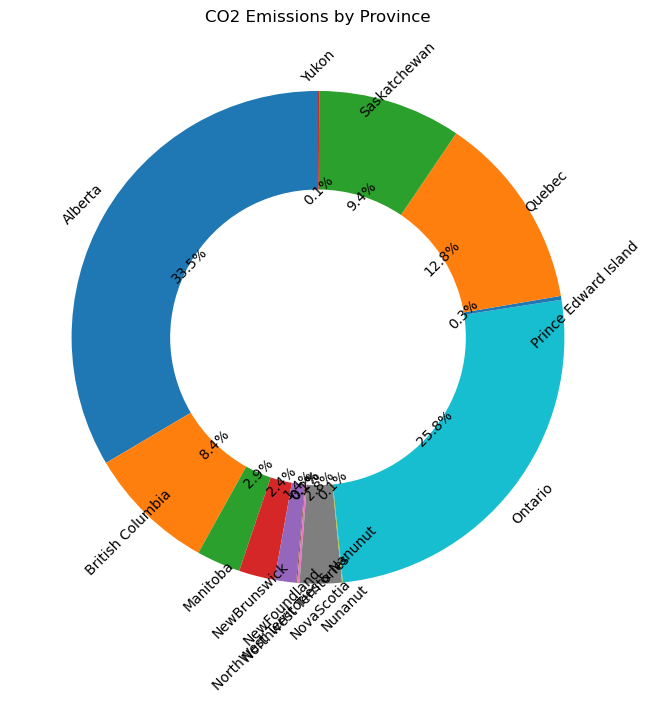

In [39]:
import matplotlib.pyplot as plt

# Group by 'Province' and calculate the sum for each group for the 'CO2eq' column
sum_by_province = GHG_emissions.groupby('Province')['CO2eq'].sum()

# Plot the pie chart with slanted percentages
plt.figure(figsize=(8, 8))
plt.pie(sum_by_province, labels=sum_by_province.index, autopct=lambda p: '{:.1f}%'.format(p),
        startangle=90, wedgeprops=dict(width=0.4), textprops={'rotation': 45, 'va': 'center', 'ha': 'center'})
plt.title('CO2 Emissions by Province')
plt.show()

**Alberta contributes 33.9% to the total greenhouse gas emissions in Canada**

**4.6 Heat map analysing the sum of the CO2eq million tonnes from different sources for all Provinces in Canada**

In [40]:
# Group by 'Province' and 'Greenhouse Gas Categories', then calculate the sum of 'CO2eq' for each combination
sum_by_region_source = GHG_emissions.groupby(['Province', 'Greenhouse Gas Categories'])['CO2eq'].sum()
sum_by_region_source

Province                         Greenhouse Gas Categories           
Alberta                          AGRICULTURE                             5.028010e+05
                                 ENERGY                                  6.538444e+06
                                 INDUSTRIAL PROCESSES AND PRODUCT USE    3.319310e+05
                                 WASTE                                   9.229905e+04
British Columbia                 AGRICULTURE                             6.869698e+04
                                 ENERGY                                  1.605360e+06
                                 INDUSTRIAL PROCESSES AND PRODUCT USE    1.242472e+05
                                 WASTE                                   7.739397e+04
Manitoba                         AGRICULTURE                             1.770074e+05
                                 ENERGY                                  4.089924e+05
                                 INDUSTRIAL PROCESSES AND PRODUCT USE 

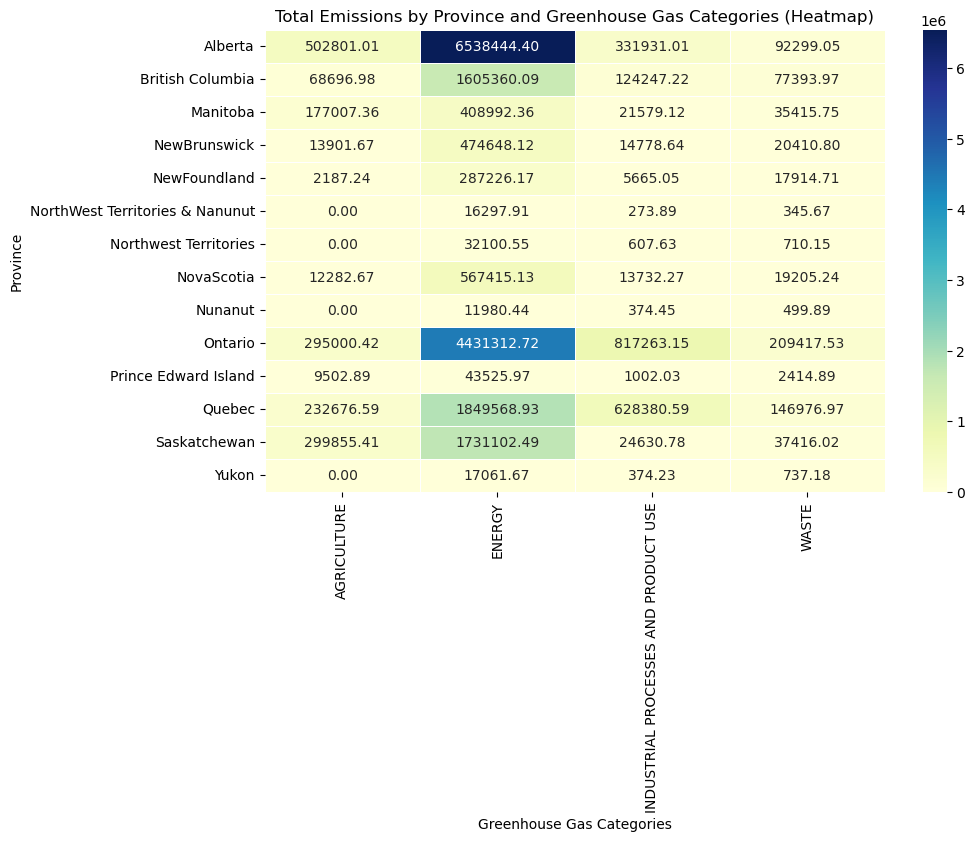

In [41]:
heatmap_data = sum_by_region_source.reset_index().pivot('Province', 'Greenhouse Gas Categories', 'CO2eq')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Total Emissions by Province and Greenhouse Gas Categories (Heatmap)')
plt.show()

**The heatmap shows Alberta,Ontario,Quebec,Saskatchwan and British Columbia as the major contributors to Canada's green house gas emissions**

**4.7 Heatmap analysing emissions by Year and Greenhouse Gas Categories**

In [42]:
# Group by 'Province' and 'Greenhouse Gas Categories', then calculate the sum of 'CO2eq' for each combination
sum_by_year_source = GHG_emissions.groupby(['Year', 'Greenhouse Gas Categories'])['CO2eq'].sum()
sum_by_year_source

Year  Greenhouse Gas Categories           
1990  AGRICULTURE                              41139.871567
      ENERGY                                  471564.748642
      INDUSTRIAL PROCESSES AND PRODUCT USE     67905.649171
      WASTE                                    18932.593100
1991  AGRICULTURE                              41316.429959
                                                  ...      
2020  WASTE                                    21049.663565
2021  AGRICULTURE                              54243.757619
      ENERGY                                  540685.813218
      INDUSTRIAL PROCESSES AND PRODUCT USE     53472.165563
      WASTE                                    21057.250246
Name: CO2eq, Length: 128, dtype: float64

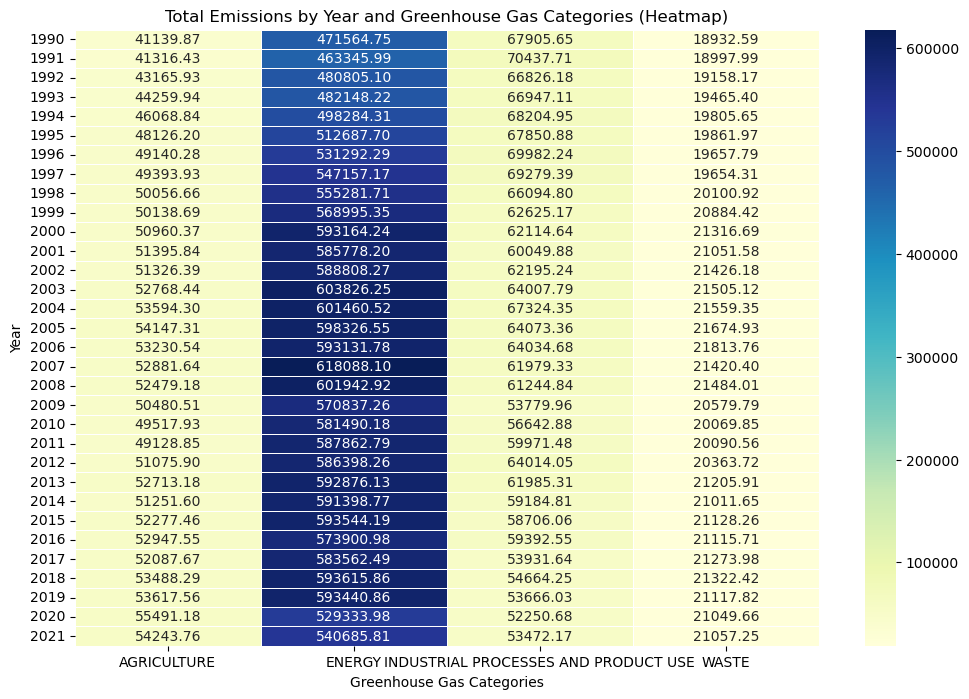

In [43]:
heatmap_data = sum_by_year_source.reset_index().pivot('Year', 'Greenhouse Gas Categories', 'CO2eq')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Total Emissions by Year and Greenhouse Gas Categories (Heatmap)')
plt.show()

**The least Greenhouse Gas emissions was generated in 2020 due to impact of Covid-19, the highest GHG emissions was generated on 2007**

**4.8 CO2 Emissions Trend Analysis (1990-2021)**

In [44]:
# Group by 'Year' and calculate the sum for each group for the 'CO2eq' column
sum_by_year = GHG_emissions.groupby('Year')['CO2eq'].sum()
sum_by_year

Year
1990    599542.862480
1991    594098.111707
1992    609955.382658
1993    612820.672447
1994    632363.756085
1995    648526.760535
1996    670072.594820
1997    685484.801182
1998    691534.102874
1999    702643.634481
2000    727555.932212
2001    718275.489896
2002    723756.083395
2003    742107.609345
2004    743938.512683
2005    738222.155552
2006    732210.761486
2007    754369.472489
2008    737150.942890
2009    695677.522397
2010    707720.852028
2011    717053.683719
2012    721851.929339
2013    728780.525648
2014    722846.829965
2015    725655.967444
2016    707356.785012
2017    710855.784391
2018    723090.821022
2019    721842.256429
2020    658125.507827
2021    669458.986645
Name: CO2eq, dtype: float64

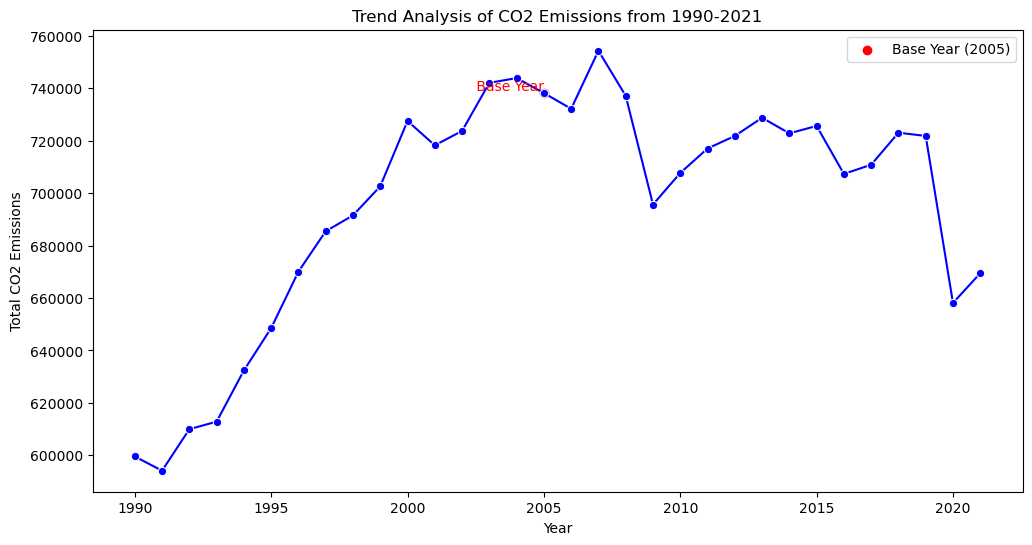

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Year' and calculate the sum for each group for the 'CO2eq' column
sum_by_year = GHG_emissions.groupby('Year')['CO2eq'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sum_by_year.index, y=sum_by_year.values, marker='o', color='blue')

# Add a tag for the base year (2005)
base_year = 2005
base_year_index = sum_by_year.index.get_loc(base_year)

plt.scatter(base_year, sum_by_year[base_year], color='red', marker='o', label='Base Year (2005)')
plt.text(base_year, sum_by_year[base_year], ' Base Year', ha='right', va='bottom', color='red')

# Add labels and title
plt.title('Trend Analysis of CO2 Emissions from 1990-2021')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.legend()
plt.show()

**4.9 Scatter Plot of Year and CO2eq**

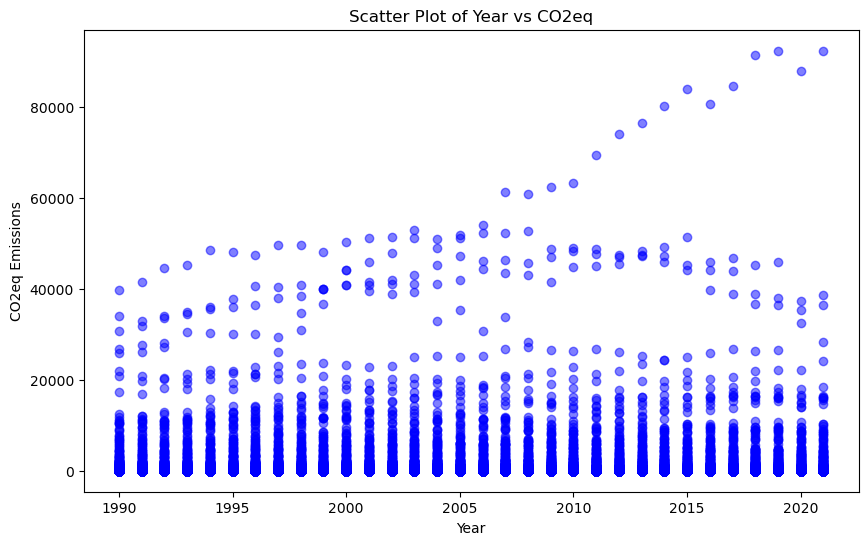

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Year vs CO2eq
plt.scatter(GHG_emissions['Year'], GHG_emissions['CO2eq'], alpha=0.5, color='blue')

# Add labels and title
plt.title('Scatter Plot of Year vs CO2eq')
plt.xlabel('Year')
plt.ylabel('CO2eq Emissions')

# Show the plot
plt.show()

**5.0 Correlation Heatmap of CO2eq and Year**

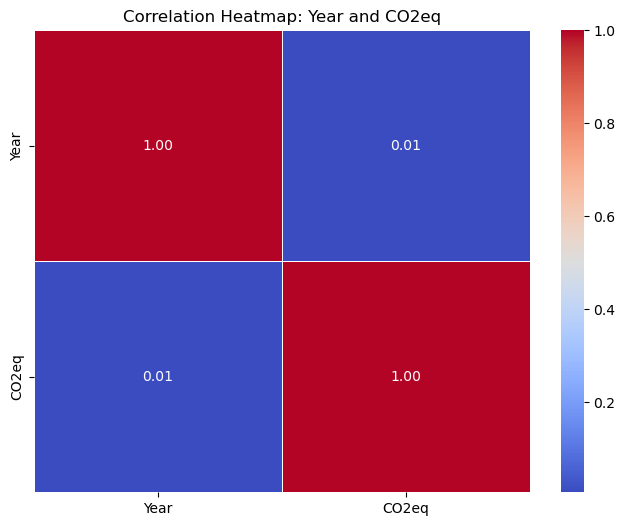

In [47]:
correlation_matrix = GHG_emissions[['Year', 'CO2eq']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Year and CO2eq')
plt.show()

**This correlation matrix shows a weak linear relationship between CO2eq and year**

# **POLICY EVALUATION- Effect of Greenhouse Gas emissions reduction policies on the volume of GHG's emitted**

**1.  Under the Paris Agreement, in 2015, Canada pledged to meet or exceed a GHG emissions-reduction target of 30% below 2005 levels by 2030.**

In [48]:
# Filter the data for the years 2005 and 2021
ghg_2005 = GHG_emissions[GHG_emissions['Year'] == 2005]['CO2eq'].sum()
ghg_2021 = GHG_emissions[GHG_emissions['Year'] == 2021]['CO2eq'].sum()

# Calculate the percentage reduction
percentage_reduction = ((ghg_2005 - ghg_2021) / ghg_2005) * 100
percentage_reduction

9.314698616080772

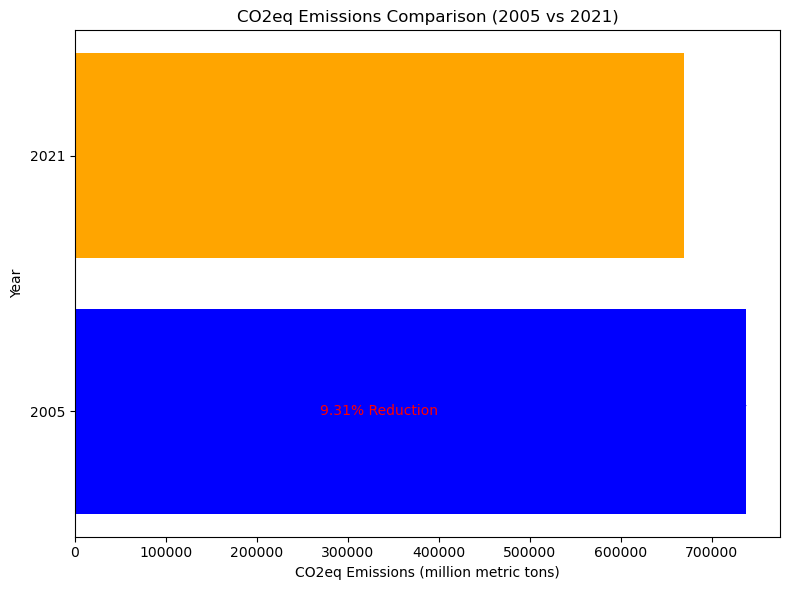

In [49]:
# Calculate the percentage reduction
ghg_2005 = GHG_emissions[GHG_emissions['Year'] == 2005]['CO2eq'].sum()
ghg_2021 = GHG_emissions[GHG_emissions['Year'] == 2021]['CO2eq'].sum()
percentage_reduction = ((ghg_2005 - ghg_2021) / ghg_2005) * 100

# Plotting the percentage reduction
plt.figure(figsize=(8, 6))
plt.barh(['2005', '2021'], [ghg_2005, ghg_2021], color=['blue', 'orange'])
plt.title('CO2eq Emissions Comparison (2005 vs 2021)')
plt.xlabel('CO2eq Emissions (million metric tons)')
plt.ylabel('Year')
plt.text(ghg_2005, 0, f'{ghg_2005:.2f} MMT', va='center', ha='right', color='blue')
plt.text(ghg_2021, 1, f'{ghg_2021:.2f} MMT', va='center', ha='right', color='orange')
plt.text(ghg_2021 / 2, 0, f'{percentage_reduction:.2f}% Reduction', va='center', ha='center', color='red')
plt.tight_layout()
plt.show()

**There has been a 9.31% reduction in Canada's greenhouse gas emissions between 2005 and 2021**

**2. Requiring Oil and Gas companies to reduce methane emissions by at least 75% below 2012 levels by 2030**

Percentage reduction in CO2eq emissions between 2012 and 2021: 25.541303519772878


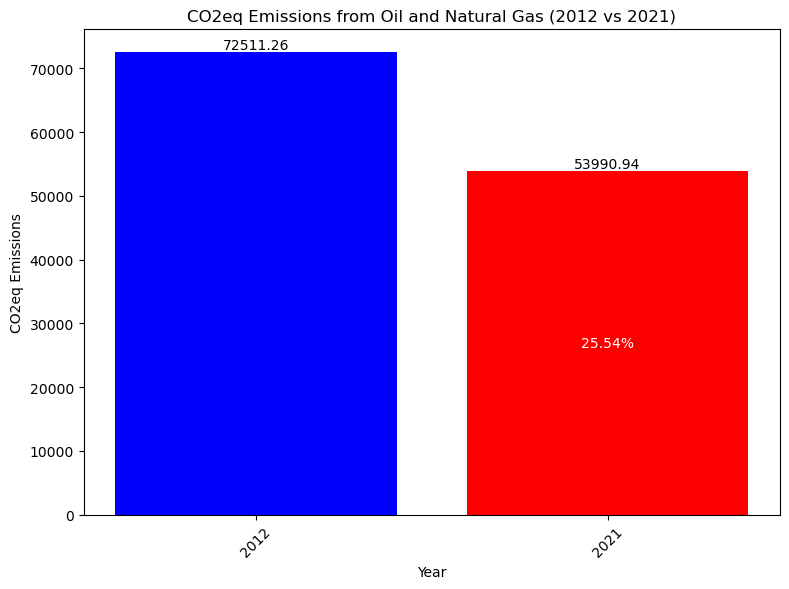

In [50]:
# Filter the dataset for 'Oil and Natural Gas' sub-sector
oil_natural_gas_emissions = GHG_emissions[GHG_emissions['Sub-sector'] == 'Oil and Natural Gas']

# Group the filtered data by year and sum the CO2eq emissions for each year
oil_natural_gas_emissions_by_year = oil_natural_gas_emissions.groupby('Year')['CO2eq'].sum()

# Calculate the total CO2eq emissions for the years 2012 and 2021
co2eq_2012 = oil_natural_gas_emissions_by_year.loc[2012]
co2eq_2021 = oil_natural_gas_emissions_by_year.loc[2021]

# Calculate the percentage reduction in CO2eq emissions between 2012 and 2021
percentage_reduction = ((co2eq_2012 - co2eq_2021) / co2eq_2012) * 100

print("Percentage reduction in CO2eq emissions between 2012 and 2021:", percentage_reduction)

# Plot the percentage reduction with a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['2012', '2021'], [co2eq_2012, co2eq_2021], color=['blue', 'red'])
plt.title('CO2eq Emissions from Oil and Natural Gas (2012 vs 2021)')
plt.xlabel('Year')
plt.ylabel('CO2eq Emissions')

# Annotate the bars with their respective values and the percentage reduction
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    if bar.get_height() == co2eq_2021:
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'{percentage_reduction:.2f}%', va='center', ha='center', color='white')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**There has been a 25.5% reduction in CO2eq from Oil and Natural Gas between 2012 and 2021**

**3. A commitment to phase out unabated coal use by 2030**

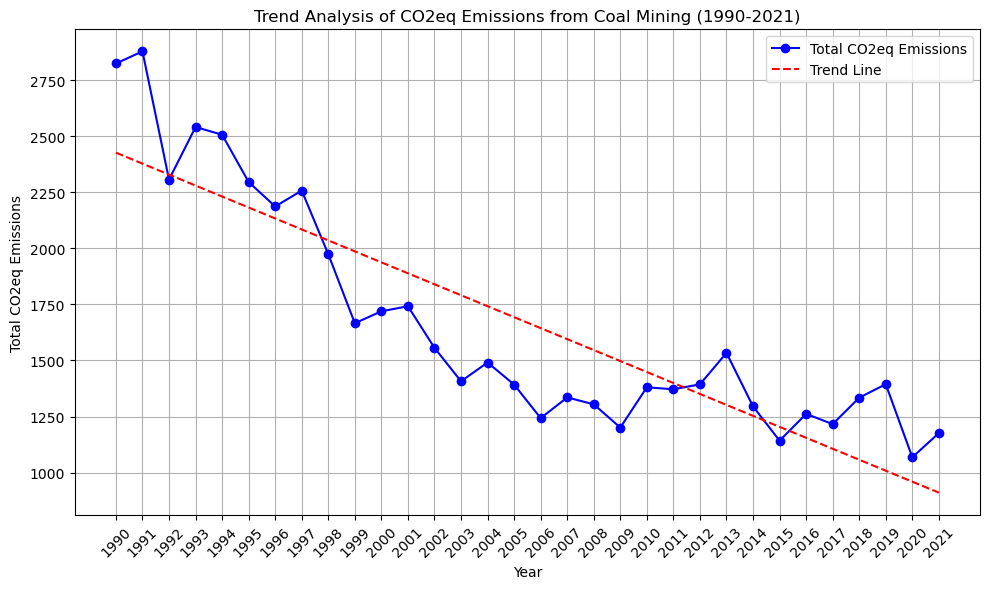

In [51]:
# Filter the dataset for coal mining emissions
coal_mining_emissions = GHG_emissions[GHG_emissions['Sub-sector'] == 'Coal Mining']

# Group the data by year and sum the CO2eq emissions for each year
coal_mining_emissions_by_year = coal_mining_emissions.groupby('Year')['CO2eq'].sum()

# Plot the trend line from 1990 to 2021
plt.figure(figsize=(10, 6))

# Plot total CO2eq emissions for each year
plt.plot(coal_mining_emissions_by_year.index, coal_mining_emissions_by_year.values, marker='o', color='b', label='Total CO2eq Emissions')

# Plot trend line
z = np.polyfit(coal_mining_emissions_by_year.index, coal_mining_emissions_by_year.values, 1)
p = np.poly1d(z)
plt.plot(coal_mining_emissions_by_year.index, p(coal_mining_emissions_by_year.index), "r--", label="Trend Line")

plt.title('Trend Analysis of CO2eq Emissions from Coal Mining (1990-2021)')
plt.xlabel('Year')
plt.ylabel('Total CO2eq Emissions')
plt.grid(True)
plt.xticks(range(1990, 2022), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Greenhouse Gas emissions from coal mining has been on a major downward trend nearing zero**

**4. Creating a 100-percent net-zero electricity system by 2035**

In [52]:
# Filter the dataset for coal mining emissions
electricity_emissions = GHG_emissions[GHG_emissions['Sub-sector'] == 'Public Electricity and Heat Production ']

# Group the data by year and sum the CO2eq emissions for each year
electricity_emissions_by_year = electricity_emissions.groupby('Year')['CO2eq'].sum()


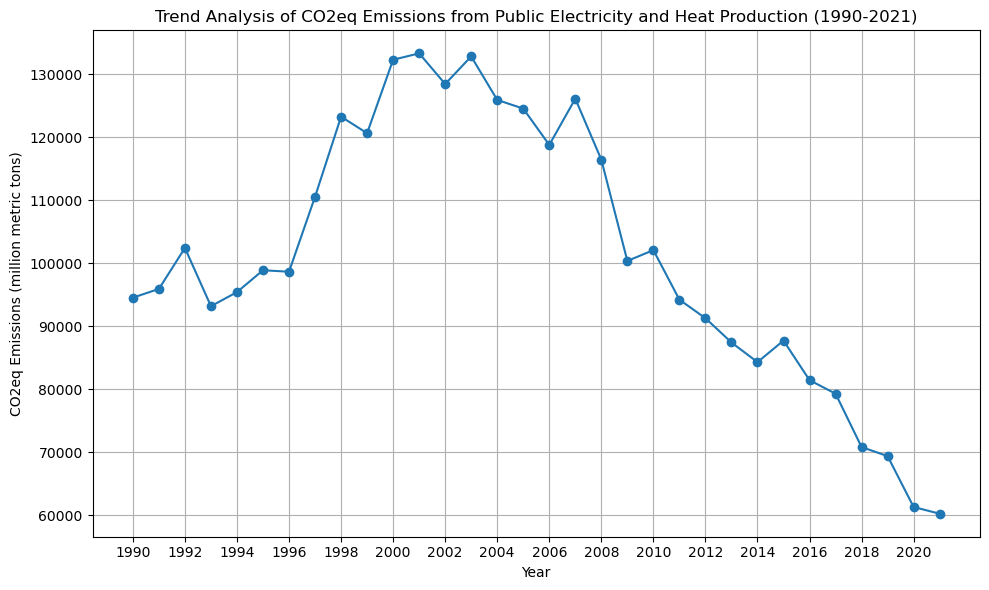

In [53]:
electricity_emissions_by_year = electricity_emissions_by_year.sort_index()

# Plotting the trend analysis
plt.figure(figsize=(10, 6))
plt.plot(electricity_emissions_by_year.index, electricity_emissions_by_year.values, marker='o', linestyle='-')
plt.title('Trend Analysis of CO2eq Emissions from Public Electricity and Heat Production (1990-2021)')
plt.xlabel('Year')
plt.ylabel('CO2eq Emissions (million metric tons)')
plt.grid(True)
plt.xticks(range(1990, 2022, 2))  # Setting x-axis ticks for every 2 years
plt.tight_layout()
plt.show()

# **Constructing ML models that project future emission trends while accounting for the policy of "Requiring the oil and gas sector to be net-zero by 2050 and setting interim five-year targets"**

**Scaling the CO2eq data**

**Scaling can lead to better generalization of the model. When the features are on similar scales, the model can more easily learn the underlying patterns in the data, leading to improved performance on unseen data.**

In [54]:
# Extract the CO2eq column
co2eq_values = GHG_emissions['CO2eq'].values

In [55]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your CO2eq values
scaler.fit(co2eq_values.reshape(-1, 1))  # Reshape to a column vector

# Scale the CO2eq values
scaled_co2eq_values = scaler.transform(co2eq_values.reshape(-1, 1)).flatten()  # Flatten back to 1D array

# Replace original CO2eq column with scaled values in the DataFrame
GHG_emissions['CO2eq'] = scaled_co2eq_values

# Save the modified DataFrame to a new excel file
GHG_emissions.to_excel('scaled_dataset.xlsx', index=False)

In [56]:
# Specify the desired path and filename for the scaled dataset
co2eq_scaled = 'scaled_dataset.xlsx'

In [57]:
# Save the modified DataFrame to a new Excel file
GHG_emissions.to_excel(co2eq_scaled, index=False)

In [58]:
### Read the scaled dataset from the Excel file
scaled_df = pd.read_excel('scaled_dataset.xlsx')

scaled_df.head()

Year Province Greenhouse Gas Categories                         Sector  \
0  1990  Alberta                    ENERGY  Stationary Combustion Sources   
1  1990  Alberta                    ENERGY  Stationary Combustion Sources   
2  1990  Alberta                    ENERGY  Stationary Combustion Sources   
3  1990  Alberta                    ENERGY  Stationary Combustion Sources   
4  1990  Alberta                    ENERGY  Stationary Combustion Sources   

                                Sub-sector     CO2eq  
0  Public Electricity and Heat Production   0.430084  
1            Petroleum Refining Industries  0.032369  
2                   Oil and Gas Extraction  0.289829  
3                                   Mining  0.003221  
4                 Manufacturing Industries  0.113098

**Filter rows related to 'Oil and Natural Gas' and 'Oil and Gas Extraction'**

In [59]:
oil_gas_df = scaled_df[(scaled_df['Sub-sector'] == 'Oil and Natural Gas') | (scaled_df['Sub-sector'] == 'Oil and Gas Extraction')]
oil_gas_df.reset_index(drop=True, inplace=True)

In [60]:
# Step 2: Perform one-hot encoding for categorical variables
oil_gas_df = pd.get_dummies(oil_gas_df, columns=['Province', 'Greenhouse Gas Categories', 'Sector', 'Sub-sector'])


**FEATURE ENGINEERING**

In [61]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [62]:
# Define features (X) and target variable (y)
X = oil_gas_df.drop(columns=['CO2eq'])  # Features
y = oil_gas_df['CO2eq']  # Target variable

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


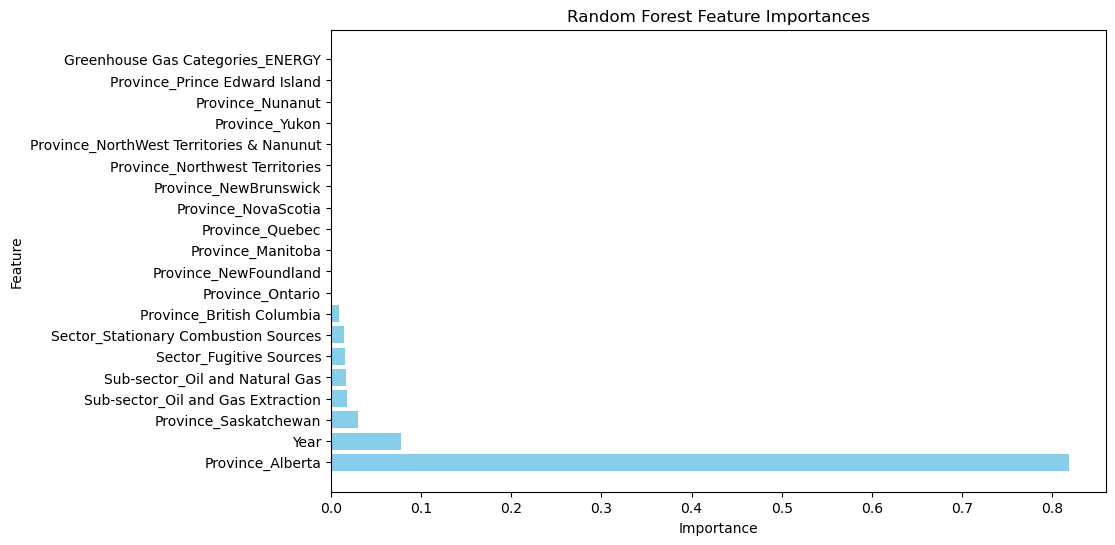

In [63]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

**Extract the important features from the original dataset**

In [64]:
features_selected = ['Province_Alberta', 'Year','Province_Saskatchewan', 'Sub-sector_Oil and Gas Extraction',
                     'Sub-sector_Oil and Natural Gas', 'Sector_Fugitive Sources', 'Sector_Stationary Combustion Sources',
                     'Province_British Columbia']

X_select = X[features_selected]

**Add binary indicators for policy implementation dates or targets.**

In [65]:
# Step 3: Feature Engineering
#This DataFrame will be used to store the binary indicators for policy years in the subsequent steps of the code.
policy_years = {
    2025: 'interim_target_1',
    2030: 'interim_target_2',
    2035: 'interim_target_3',
    2040: 'interim_target_4',
    2045: 'interim_target_5',
    2050: 'net_zero'
}
additional_features = pd.DataFrame(index=oil_gas_df.index)
for year, target in policy_years.items():
    additional_features[target] = (oil_gas_df['Year'] >= year).astype(int)

oil_gas_df = pd.concat([oil_gas_df, additional_features], axis=1)

In [66]:
# Step 4: Model selection using LSTM neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy

# Use selected features
X = X_select  # Use selected features
y = oil_gas_df['CO2eq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape features for LSTM input
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/20
21/21 - 9s - loss: 0.0224 - val_loss: 0.0224 - 9s/epoch - 444ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0210 - val_loss: 0.0206 - 309ms/epoch - 15ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0180 - val_loss: 0.0135 - 316ms/epoch - 15ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0132 - val_loss: 0.0083 - 304ms/epoch - 14ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0069 - val_loss: 0.0056 - 331ms/epoch - 16ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0048 - val_loss: 0.0045 - 307ms/epoch - 15ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0039 - val_loss: 0.0050 - 381ms/epoch - 18ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0044 - val_loss: 0.0036 - 348ms/epoch - 17ms/step
Epoch 9/20
21/21 - 0s - loss: 0.0038 - val_loss: 0.0040 - 377ms/epoch - 18ms/step
Epoch 10/20
21/21 - 0s - loss: 0.0045 - val_loss: 0.0042 - 332ms/epoch - 16ms/step
Epoch 11/20
21/21 - 0s - loss: 0.0041 - val_loss: 0.0069 - 389ms/epoch - 19ms/step
Epoch 12/20
21/21 - 0s - loss: 0.0049 - val_loss: 0.0042 - 393ms/epoch - 19ms/step
Epoch 13/20
21/

In [70]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lstm_units = [50, 100, 150]
batch_sizes = [32, 64, 128]
epochs = [10, 20, 30]

best_performance = float('inf')
best_hyperparameters = {}
best_r2 = 0

for units in lstm_units:
    for batch_size in batch_sizes:
        for num_epochs in epochs:
            model = Sequential()
            model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')

            history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            
            if mse < best_performance:
                best_performance = mse
                best_hyperparameters = {'LSTM_units': units, 'Batch_size': batch_size, 'Epochs': num_epochs}
                

print("Best hyperparameters:", best_hyperparameters)
print("Best performance (MSE):", best_performance)

6/6 [==============================] - 1s 7ms/step
Best hyperparameters: {'LSTM_units': 100, 'Batch_size': 32, 'Epochs': 30}
Best performance (MSE): 0.0035052978221232424


6/6 [==============================] - 0s 12ms/step


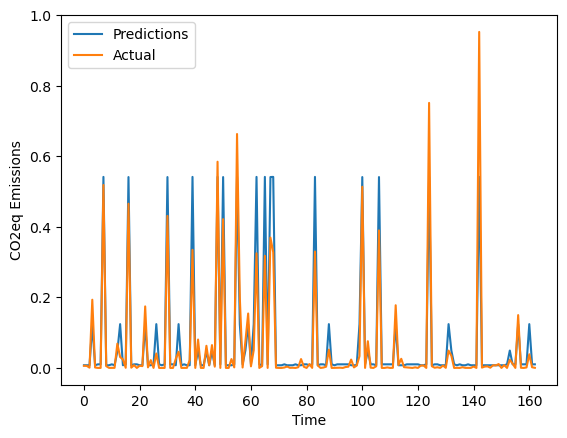

In [68]:
# Step 6: Make Predictions
predictions = model.predict(X_test)

# Plot the predictions against actual values
plt.plot(predictions, label='Predictions')
plt.plot(y_test.values, label='Actual')
plt.xlabel('Time')
plt.ylabel('CO2eq Emissions')
plt.legend()
plt.show()

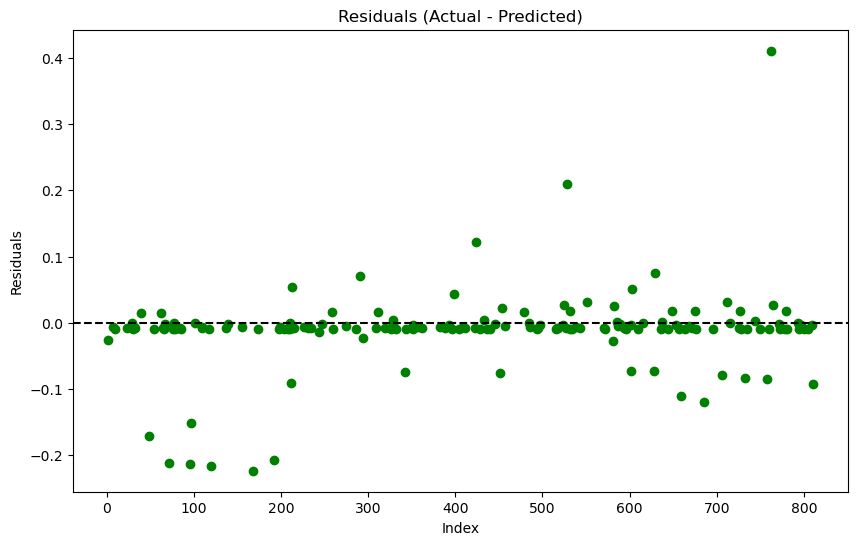

Mean Residual: -0.011556387247501108
Standard Deviation of Residuals: 0.06110303843919433


In [69]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Flatten y_test and predictions arrays
y_test_flat = y_test.values.flatten()
predictions_flat = y_pred.flatten()

# Calculate the residuals (the differences between actual and predicted values)
residuals = y_test_flat - predictions_flat

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, residuals, marker='o', linestyle='', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

# Calculate and print metrics
mean_residual = residuals.mean()
std_residual = residuals.std()
print("Mean Residual:", mean_residual)
print("Standard Deviation of Residuals:", std_residual)